In [1]:
!pip install torchviz==0.0.3 -q

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import dataloader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torchviz import make_dot

#### Load dataset

In [3]:
iris = sns.load_dataset('iris')
iris.head(), iris.species.unique(), type(iris)

(   sepal_length  sepal_width  petal_length  petal_width species
 0           5.1          3.5           1.4          0.2  setosa
 1           4.9          3.0           1.4          0.2  setosa
 2           4.7          3.2           1.3          0.2  setosa
 3           4.6          3.1           1.5          0.2  setosa
 4           5.0          3.6           1.4          0.2  setosa,
 array(['setosa', 'versicolor', 'virginica'], dtype=object),
 pandas.core.frame.DataFrame)

In [4]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values
unique_clsses = iris.iloc[:, -1].unique()
X, y, unique_clsses, type(X), type(y)

# iris.values

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [5]:
for i in range(len(unique_clsses)):
    y[iris.species == unique_clsses[i]] = i
y = y.astype(int)
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [6]:
X.shape, y.shape

((150, 4), (150,))

#### Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

#### Transform to pytorch

In [8]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

#### Create Neural Network

In [9]:
class NN_Classifier(nn.Module):
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(4, 32)
        self.fc = nn.Linear(32, 32)

        # Classification or output layer
        self.output = nn.Linear(32, 3)

    # Forward pass
    def forward(self, x):
        # pass data through input layer
        x = self.input(x)
        # hidden layer
        x = self.fc(x)
        # apply ReLU activation
        x = F.relu(x)

        # output layer
        x = self.output(x)
        # x = torch.sigmoid # using cross entropy loss (so not binary)
        return x

model = NN_Classifier()

#### Visualize computation graph (before training)

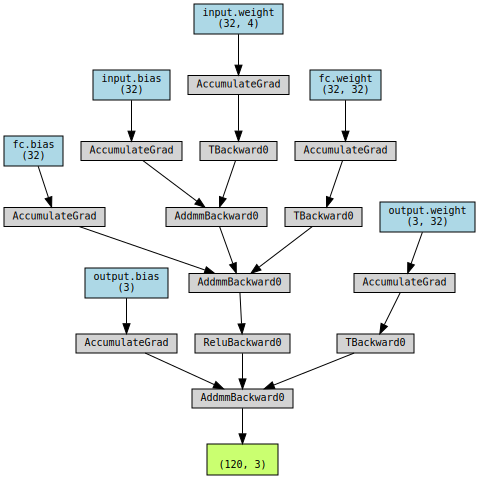

In [10]:
ypred = model(X_train)
make_dot(ypred, params=dict(model.named_parameters()))

In [11]:
learningRate = 0.01
lossfunc = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate,)

In [12]:
epochs = 3501
losses = torch.zeros(epochs)

for epoch in range(epochs):
    # Forward propagation
    ypred = model(X_train)
    loss = lossfunc(ypred, y_train)
    # Record the loss
    losses[epoch] = loss.detach()

    # Backward propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if epoch % 100 == 0:
        print(f'Epoch: {epoch}; Loss: {loss.item():.4f}')
    accuracy = 100*torch.mean((torch.argmax(ypred, axis=1) == y_train).float())

Epoch: 0; Loss: 1.1932
Epoch: 100; Loss: 0.7128
Epoch: 200; Loss: 0.4844
Epoch: 300; Loss: 0.3792
Epoch: 400; Loss: 0.2975
Epoch: 500; Loss: 0.2310
Epoch: 600; Loss: 0.1830
Epoch: 700; Loss: 0.1510
Epoch: 800; Loss: 0.1298
Epoch: 900; Loss: 0.1153
Epoch: 1000; Loss: 0.1050
Epoch: 1100; Loss: 0.0974
Epoch: 1200; Loss: 0.0917
Epoch: 1300; Loss: 0.0873
Epoch: 1400; Loss: 0.0839
Epoch: 1500; Loss: 0.0811
Epoch: 1600; Loss: 0.0787
Epoch: 1700; Loss: 0.0768
Epoch: 1800; Loss: 0.0752
Epoch: 1900; Loss: 0.0738
Epoch: 2000; Loss: 0.0725
Epoch: 2100; Loss: 0.0715
Epoch: 2200; Loss: 0.0705
Epoch: 2300; Loss: 0.0697
Epoch: 2400; Loss: 0.0690
Epoch: 2500; Loss: 0.0683
Epoch: 2600; Loss: 0.0677
Epoch: 2700; Loss: 0.0671
Epoch: 2800; Loss: 0.0666
Epoch: 2900; Loss: 0.0662
Epoch: 3000; Loss: 0.0658
Epoch: 3100; Loss: 0.0654
Epoch: 3200; Loss: 0.0650
Epoch: 3300; Loss: 0.0646
Epoch: 3400; Loss: 0.0643
Epoch: 3500; Loss: 0.0640


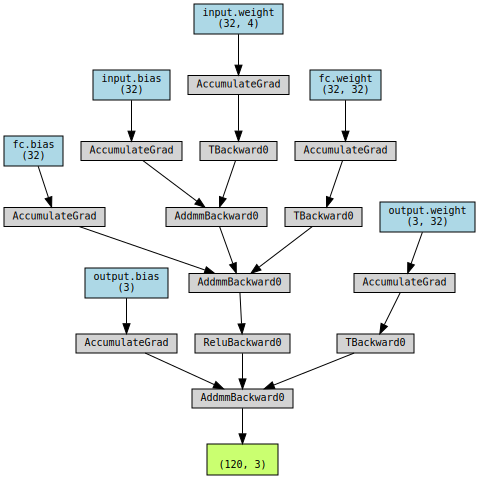

In [13]:
# Visualize computation graph (after training)
make_dot(ypred, params=dict(model.named_parameters()))

#### Loss vs Epoch

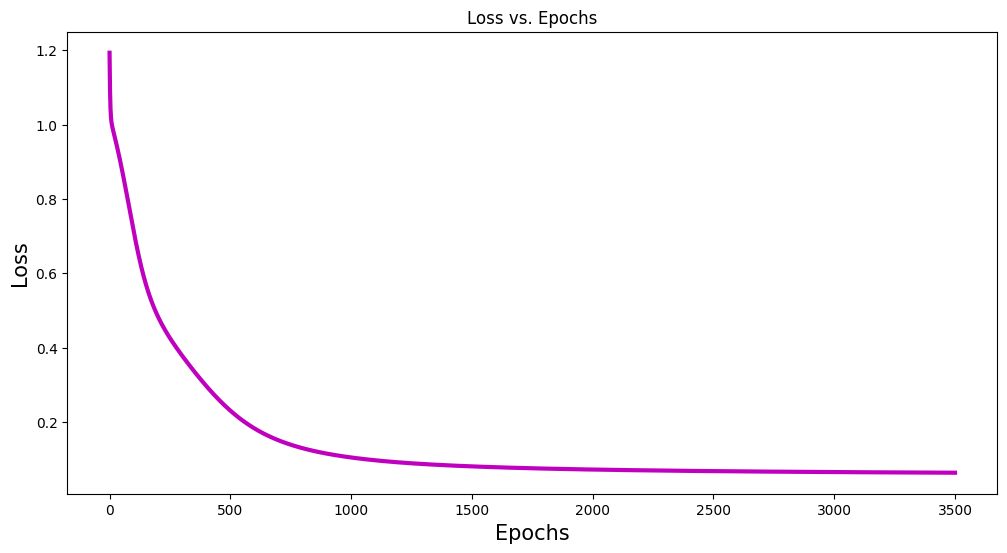

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(epochs), losses.detach(), 'm', lw=3)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('Loss vs. Epochs')
plt.show()

#### Weights and Bias of training model

In [15]:
# We have 1 ip layer with 4 features; 1 hl; 1 op layer with 3 class
print(f"Trained Weight: {model.input.weight.detach().numpy()}")
print(f"Trained Bias: {model.input.bias.detach().numpy()}")

Trained Weight: [[ 0.32897624  0.20473228  0.5337185  -0.15199588]
 [-0.4850984  -0.0222369   0.32931426  0.08463295]
 [-0.16463657 -0.0401701  -0.085682   -0.08514252]
 [-0.11017431 -0.64289075  0.34771016 -0.04510466]
 [-0.279137    0.49788016 -0.09039389 -0.1373897 ]
 [ 0.3373241  -0.16616282 -0.62205505  0.37895912]
 [ 0.4360656  -0.5531075   0.5917971  -0.22527514]
 [ 0.54439634  0.2713609   0.20861034 -0.10873362]
 [ 0.46771052 -0.11500977  0.54431826  0.57201225]
 [-0.04148984  0.05140325  0.6671451   0.09739777]
 [-0.36190706 -0.5445331   0.63949174 -0.10999125]
 [ 0.09926819 -0.02842664  0.3073873  -0.03208433]
 [-0.27070734  0.17988807  0.03392339  0.22314745]
 [ 0.19851413  0.03043319  0.23309377 -0.35124034]
 [-0.5766859  -0.68502903  0.5264027   0.8435409 ]
 [-0.2457849   0.0985605  -0.09032495  0.41901395]
 [-0.5481618  -0.4713179   0.1387247   0.61360466]
 [ 0.13001718 -0.47312972 -0.44805858  0.10052866]
 [-0.2782397  -0.0604887  -0.08589672 -0.10551886]
 [-0.4393664   

#### Testing and evaluating the model

In [16]:
y_pred = model(X_test)
y_pred

tensor([[ -5.1540,   4.4514,   0.1461],
        [ 13.5688,   5.9750, -22.9007],
        [-17.7719,   2.6699,  16.0117],
        [ -5.2629,   4.2007,   0.5633],
        [ -5.2015,   4.8208,  -0.2545],
        [ 12.4214,   5.5569, -21.0804],
        [ -0.6335,   4.7317,  -5.1407],
        [ -9.2739,   3.7544,   5.4761],
        [ -7.4060,   3.7749,   3.4443],
        [ -2.0655,   4.6726,  -3.4956],
        [ -8.3802,   3.8345,   4.4027],
        [ 11.6107,   5.0819, -19.5274],
        [ 13.8258,   5.7484, -22.9174],
        [ 11.6927,   5.2065, -19.7756],
        [ 13.3033,   5.5591, -22.0616],
        [ -4.6908,   4.5739,  -0.5290],
        [-13.3885,   2.8218,  11.1089],
        [ -2.7398,   4.4349,  -2.4606],
        [ -5.3282,   4.0699,   0.7995],
        [-13.2154,   2.7006,  11.0631],
        [ 11.0491,   5.1097, -18.9042],
        [ -7.9932,   3.6722,   4.1854],
        [ 11.4902,   5.3194, -19.6962],
        [-12.8781,   2.8307,  10.5483],
        [-10.1013,   4.7616,   5.1404],


In [19]:
accuracy = 100*torch.mean((torch.argmax(y_pred, axis=1) == y_test).float())
accuracy

tensor(100.)